# Data Science Lab-03

<b>Name: Gurvinder Kaur Matharu<br>
PRN: 20190802077

### AIM :
Perform Exploratory Data Analysis (EDA) on the “TITANIC” dataset shared. Please make use of the information given in the Dataset_Information file.
Try to find below Exploratory Data Analysis (EDA) Steps
1. Identification of Missing Values. 
2. Identification of All The Numerical Variables. 
3. Distribution Of the Numerical Variables. 
4. Identification of Categorical Variables. 
5. Cardinality of Categorical Variables. 
6. Identification of Outliers. 
7. Relationship between independent and dependent variables.

### THEORY:
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. EDA is performed to maximise the insight into a dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('Titanic_Dataset.csv')

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
na_features = [features for features in dataset.columns 
               if dataset[features].isnull().sum()>1]

In [8]:
for i in na_features:
    print(i, np.round(dataset[i].isnull().mean(),3), '% missing values')

Age 0.199 % missing values
Cabin 0.771 % missing values
Embarked 0.002 % missing values


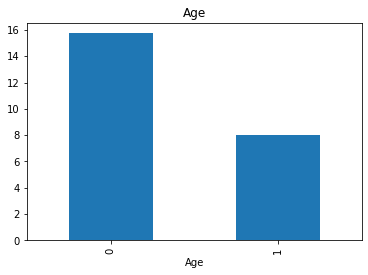

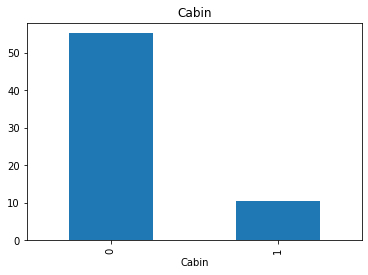

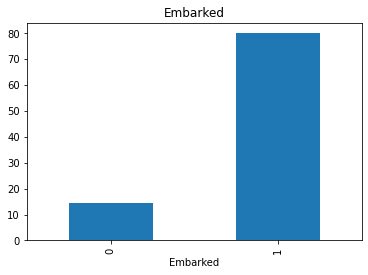

In [9]:
for i in na_features:
    data = dataset.copy()
    data[i] = np.where(data[i].isnull(),1,0) 
    # 1 for missing values and 0 for present values
    # calculating the mean fare where the value is missing or present
    data.groupby(i)['Fare'].median().plot.bar()
    plt.title(i)
    plt.show()

In [10]:
print('Passenger ID: {}'.format(len(dataset.PassengerId)))

Passenger ID: 891


In [11]:
# numerical features
num_features = [i for i in dataset.columns if dataset[i].dtype != 'O']
print("Numerical features present:" ,len(num_features))
dataset[num_features].head()

Numerical features present: 7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [12]:
# temporal variables
temp_feature = [i for i in num_features if 'Yr' in i or 'Year' in i]
temp_feature

# no temporal variables present

[]

In [13]:
# Numerical features: discrete and continuous
# for discrete variable

discrete_features = [i for i in num_features if len(dataset[i].unique())<25 
                     and i not in ['PassengerId'] ]
print("Discrete variable count: {}".format(len(discrete_features)))

Discrete variable count: 4


In [14]:
discrete_features

['Survived', 'Pclass', 'SibSp', 'Parch']

In [15]:
dataset[discrete_features].head()

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


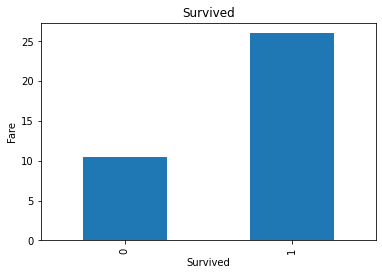

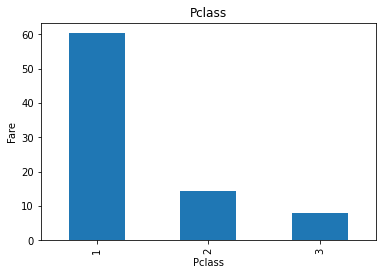

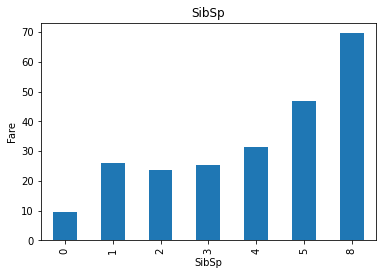

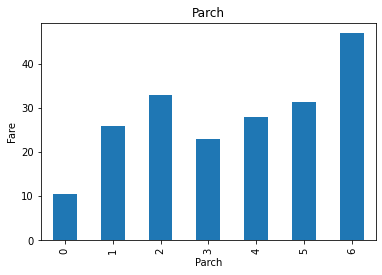

In [32]:
for i in discrete_features:
    data=dataset.copy()
    data.groupby(i)['Fare'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Fare')
    plt.title(i)
    plt.show()

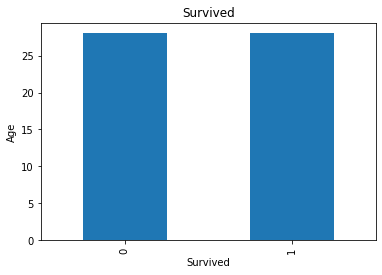

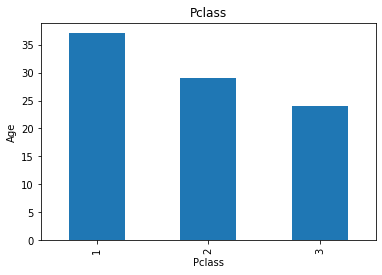

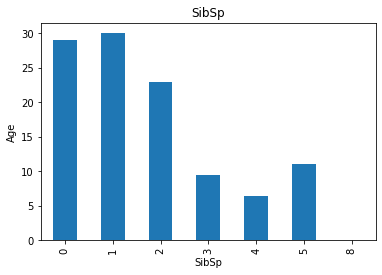

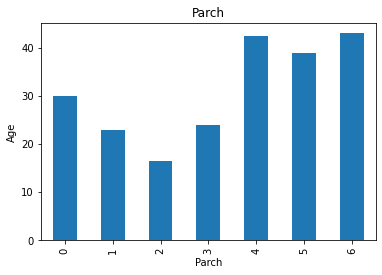

In [17]:
for i in discrete_features:
    data=dataset.copy()
    data.groupby(i)['Age'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

In [18]:
# for continuous variable
cont_features = [i for i in num_features if i not in discrete_features 
                 + ['PassengerId']]
print('Continuous variable count: {}'.format(len(cont_features)))

Continuous variable count: 2


In [19]:
cont_features

['Age', 'Fare']

In [20]:
dataset[cont_features].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


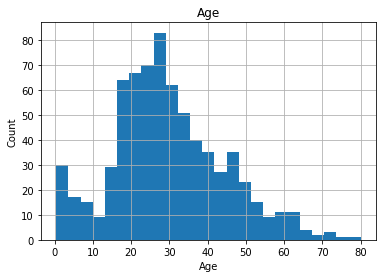

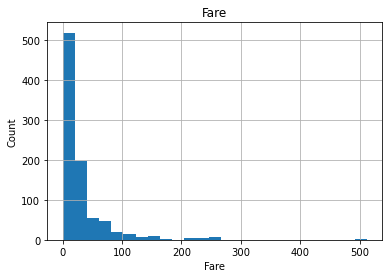

In [21]:
# creating histograms to analyze continuous
for i in cont_features:
    data=dataset.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

In [22]:
# categorical features
categorical_features = [i for i in dataset.columns if dataset[i].dtypes=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
dataset[categorical_features].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [24]:
for i in categorical_features:
    print("Feature is {} and the no. of categories are: {}".format(i, len(dataset[i].unique())))

Feature is Name and the no. of categories are: 891
Feature is Sex and the no. of categories are: 2
Feature is Ticket and the no. of categories are: 681
Feature is Cabin and the no. of categories are: 148
Feature is Embarked and the no. of categories are: 4


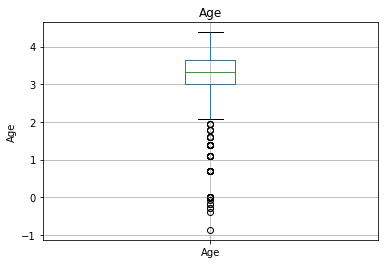

In [25]:
# outliers
for i in cont_features:
    data= dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

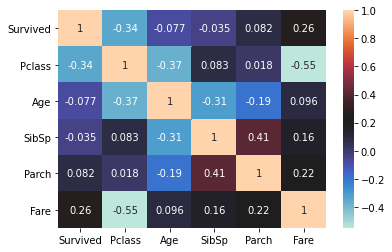

In [26]:
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="icefire")

df=dataset.drop(['PassengerId'], axis=1)
titanic_corr(df)

In [27]:
# finding correlation
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

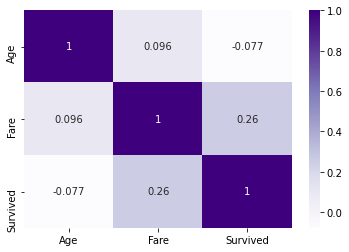

In [28]:
sns.heatmap(
    df[['Age', 'Fare', 'Survived']].corr(),
    cmap='Purples',
    annot=True,
)

### CONCLUSION:
Exploratory Data Analysis(EDA) was performed on the titanic dataset. There are 12 columns in the dataset, the columns 'Age', 'Cabin' and 'Embarked' consists of missing values. There are 7 numerical variables in the Titanic dataset. There are 4 discrete features ('Survived', 'Pclass', 'SibSp', 'Parch') and 2 continuous features ('Age', 'Fare'). There are 5 categorical features ('Name', 'Sex', 'Ticket', 'Cabin', 'Embarked') present in the dataset. 